# AMATH 342 HW 6

<p> <b> Avinash Joshi </b> </p>
<p> <b> AMATH 342 Wi 22 </b> </p>
<p> <b> Prof. Shea-Brown </b> </p>
<p> <b> 28 February 2022 </b> </p>

## I

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi']=150

In [54]:
def beta_n(v):
    r =.125*np.exp(-(v+65)/80)
    return r

def beta_m(v):
    r =  4*np.exp(-(v+65)/18)
    return r

def beta_h(v):
    r =  1/(1+np.exp(-(v+35)/10))
    return r

def alpha_n(v):
    r =  .01*(v+55)/(1-np.exp(-(v+55)/10))
    return r

def alpha_m(v):
    r =  .1*(v+40)/(1-np.exp(-(v+40)/10))
    return r

def alpha_h(v):
    r =  .07*np.exp(-(v+65)/20)
    return r

In [55]:
def Caburster(tauca, delta, gkcabar):
    vna=50; vk=-77; vl=-54.4; gna=120; gk=36; gl=.3; c=1

    v_init=-65; m_init=.052; h_init=.596; n_init=.317

    nsteps=110000 
    dt=0.01

    v=np.zeros([nsteps]); m=np.zeros([nsteps]); n=np.zeros([nsteps]); h=np.zeros([nsteps]); t=np.zeros([nsteps])

    m[0]=m_init; n[0]=n_init; h[0]=h_init; v[0]=v_init; t[0]=0.0
    
    thresh=0
    numpeak = 0
    peaktime=np.zeros([0])
    
    tauK_Ca= tauca  #time constant for decay of Ca-mediated K current
    DeltaK_Ca= delta  #jump Ca-mediated K current at each spike
    gK_Ca_bar= gkcabar  #conductance of K current, per "number" of open channels

    fK_Ca=np.zeros([nsteps])
    
    I=16.35

    iter_arr=np.arange(nsteps-1)

    for step in iter_arr:
        v[step+1]=v[step]+((I - gna*h[step]*(v[step]-vna)*m[step]**3 -gk*(v[step]-vk)*n[step]**4-gl*(v[step]-vl) 
                            - gK_Ca_bar*(v[step]-vk)*fK_Ca[step] )/c)*dt

        m[step+1]=m[step]+ (alpha_m(v[step])*(1-m[step])-beta_m(v[step])*m[step])*dt
        h[step+1]=h[step]+ (alpha_h(v[step])*(1-h[step])-beta_h(v[step])*h[step])*dt
        n[step+1]=n[step]+ (alpha_n(v[step])*(1-n[step])-beta_n(v[step])*n[step])*dt

        fK_Ca[step+1] = fK_Ca[step] + (-(tauK_Ca)**-1*fK_Ca[step])*dt 
        t[step+1]=t[step]+dt
        if [step>1] and v[step+1]<v[step] and v[step]>v[step-1] and v[step]>thresh: 
                peaktime=np.append(peaktime,t[step+1])

                fK_Ca[step+1] = fK_Ca[step] + DeltaK_Ca    

    fig, ax = plt.subplots(2,1)
    ax[0].plot(t,v)
    ax[0].set_ylabel('Voltage (mV)')
    ax[1].plot(t,fK_Ca)
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('fK_Ca')
    fig.suptitle('Calcium Bursting Conductance with tau= {}, $\Delta =$ {}, $g_m =$ {}'.format(tauca, delta, gkcabar))
    return plt.show()

To implement calcium ($Ca^{2+}$) based bursting conductance, the existing Hodgkin-Huxley style of model,
$$C\frac{dV}{dt} = -\overline{g}_L(V-E_L) - \overline{g}_Kn^4(V-E_k) - \overline{g}_{Na}m^3h(V-E_{Na}),$$ has a calcium conductance term added onto it, $$ -\overline{g}_{K,Ca}[V-E_K]f_{K,Ca}(t), $$ where $f_{K,Ca} = [Ca^{2+}] + \delta$ when a spike occurs. The expulsion of $Ca^{2+}$ is approximated by a decaying function, $\frac{dCa}{dt} = -\frac{[Ca^{2+}]}{\tau_{K,Ca}}$, always. When the neuron spikes, or if the voltage before is less than the current voltage and the following voltage is lower than the current voltage, voltage-gated $Ca^{2+}$ ion channels open allowing $Ca^{2+}$ to flood into the cell. This increases $K^+$ conductance re-hyperpolarizes the cell and prevents it from firing again until the $Ca^{2+}$ has been cleared. Only once enough $Ca^{2+}$ has been pumped outside the cell will the cell then fire again.

To enact calcium bursting in code, the  calcium conductance term is tacked onto the existing Hodgkin-Huxley Euler's method approximation. If, however, a spike occurs, as described in the previous paragraph, then a dirac delta functional increases the concentration. If the concentration of the $Ca^{2+}$ is high enough, the rate of change of the voltage will become negative and the membrane will re-hyperpolarize, or stop bursting. 

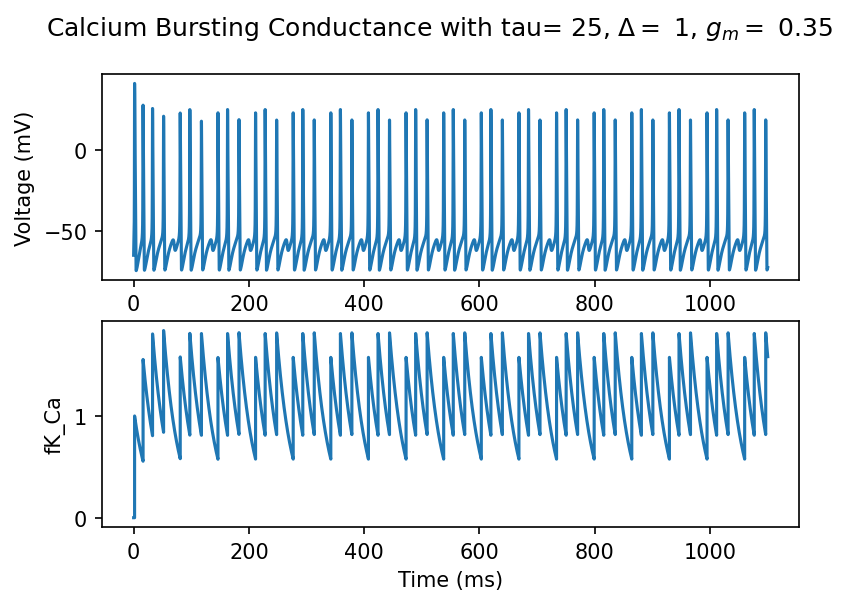

In [56]:
Caburster(25,1,0.35)

The parameters for bursting are $\tau = 25$, $\Delta = 1$, and $\overline{g}_{K,Ca} = 0.35$.

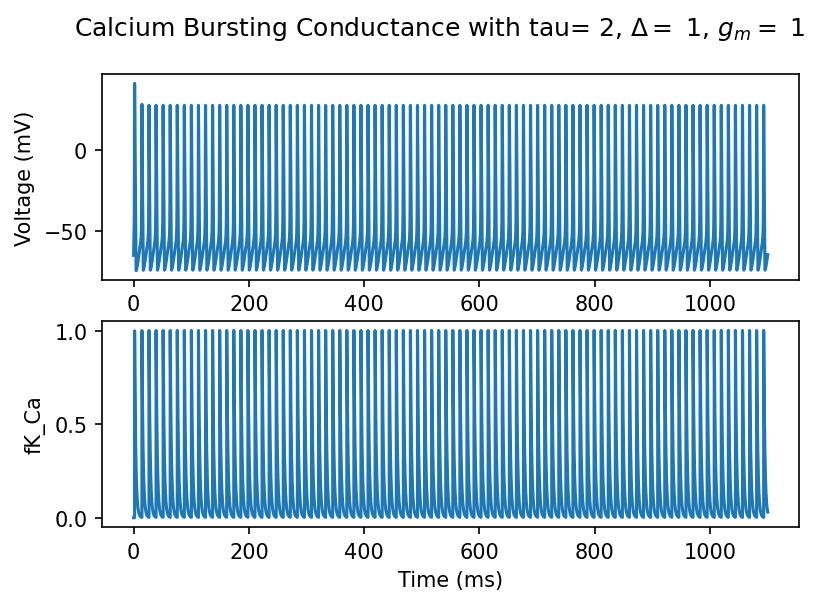

In [57]:
Caburster(2,1,1)

The failed parameters that didn't exhibit bursting are $\tau = 2$, $\Delta = 1$, and $\overline{g}_{K,Ca} = 1$. This parameter set would've never worked, even without running the simulation, because the decay constant $\tau$ is far too low. The calcium in this cell is quickly pumped out which doesn't inhibit the spiking of the cell allowing it to continuely fire.

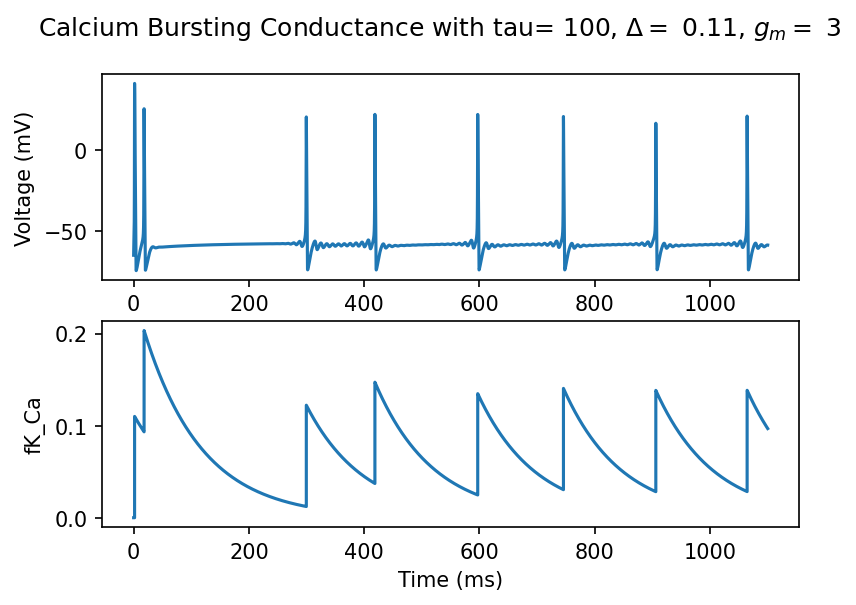

In [58]:
Caburster(100,0.11,3)

The parameters for bursting are $\tau = 100$, $\Delta = 0.11$, and $\overline{g}_{K,Ca} = 3$. In this cell, the dirac delta functional is short, but the $Ca^{2+}$ has more of an impact on the dynamics of the cell. The large $\tau$ value dramatically increases the time between spikings leading to variations in the interspike time difference and the intra-group time difference (between the clusters of two spikes).

## II

C:\Users\Bwa\AppData\Local\Temp/ipykernel_5884/1739726597.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  timespike = timespike + 1000/ratelist[ii]


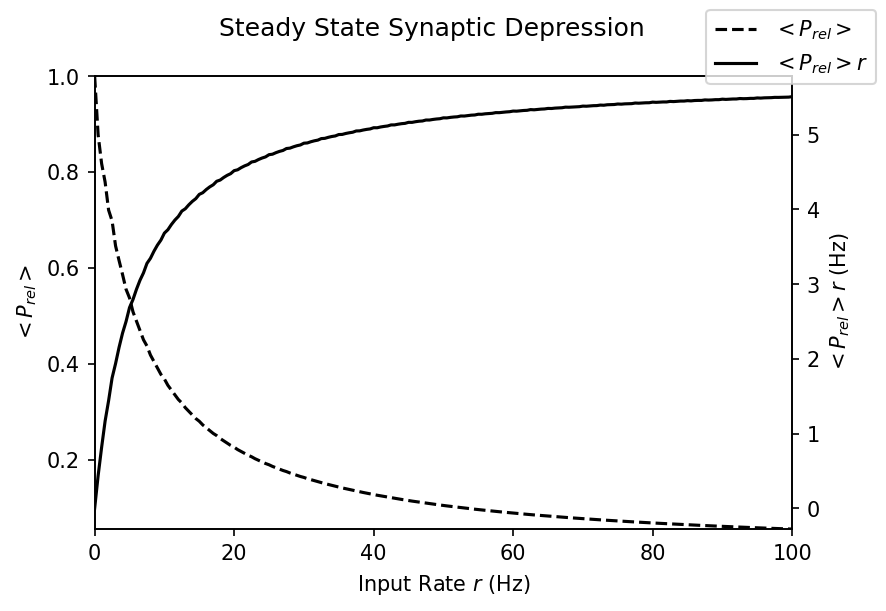

In [59]:
nsteps = 12000
dt = 0.1
iter_arr = np.arange(nsteps - 1)

stoprate = 100
tau = 300
P0 = 1
Pd = 0.5

ratelist = np.arange(0, stoprate+.5, 0.5)
Prellist = np.zeros(len(ratelist))
Prelrlist = np.zeros(len(ratelist))

for ii in range(stoprate*2 + 1):
    timespike = 0
    timelist = dt*iter_arr
    Prel = np.ones(nsteps)
    for step in iter_arr:
        time = timelist[step]
        if time > timespike:
            Prel[step] = Pd * Prel[step]
            timespike = timespike + 1000/ratelist[ii]
        Prel[step+1] = Prel[step] + dt*((P0 - Prel[step])/tau)
    Prellist[0] = 1
    Prellist[ii] = np.mean(Prel)
    Prelrlist[ii] = Prellist[ii]*(ratelist[ii])

fig, ax = plt.subplots()
fig.suptitle('Steady State Synaptic Depression')
ax2 = ax.twinx()
ax.margins(x=0, y=0)
ax.plot(ratelist, Prellist,'k--',label = '$< P_{rel} >$')
ax2.plot(ratelist, Prelrlist, 'k-',label = '$< P_{rel} > r$')
ax.set_xlabel('Input Rate $r$ (Hz)')
ax.set_ylabel('$< P_{rel} >$')
ax2.set_ylabel('$< P_{rel} > r$ (Hz)')
fig.legend()
plt.show()

In [60]:
nsteps = 12000
dt = 0.1
iter_arr = np.arange(nsteps - 1)

stoprate = 100
tau = 200
P0 = 1
Pd = 0.25

ratelist = np.array([25, 100, 10, 40])
switch = np.array([200, 500, 1000])
meanlist = np.array([0, 2000, 5000, 10000])

Prellist = np.zeros(nsteps-1)
Prelrlist = np.zeros(nsteps-1)
Prelrlistg = np.zeros(nsteps-1)

timespike = 0
timelist = dt*iter_arr
Prel = np.ones(nsteps)
currentrate = ratelist[0]
count = 0
for step in iter_arr:
    time = timelist[step]
    if count < 3 and time == switch[count]:
        currentrate = ratelist[count+1]
        count += 1
    if time > timespike:
        Prel[step] = Pd * Prel[step]
        timespike = timespike + 1000/currentrate
    Prel[step+1] = Prel[step] + dt*((P0 - Prel[step])/tau)
    Prelrlist[step] = Prel[step]*currentrate
    if step > meanlist[count] + 2:
        Prelrlistg[step-1] = np.mean(Prelrlist[meanlist[count]:step-2])

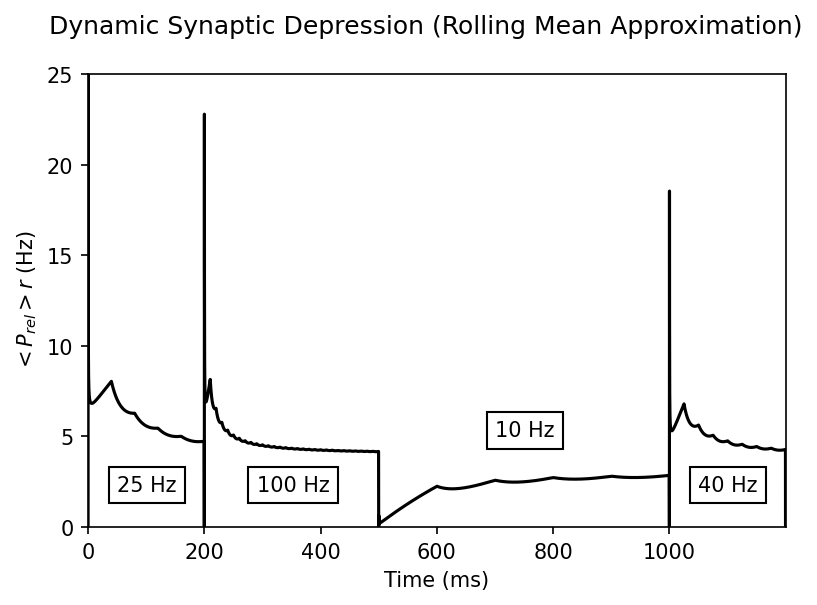

In [61]:
fig, ax = plt.subplots()
fig.suptitle('Dynamic Synaptic Depression (Rolling Mean Approximation)')
ax.margins(x=0, y=0)
ax.plot(timelist, Prelrlistg, 'k-')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('$< P_{rel} > r$ (Hz)')
ax.text(50, 2, '25 Hz', bbox = dict(facecolor = 'white'))
ax.text(290, 2, '100 Hz', bbox = dict(facecolor = 'white'))
ax.text(700, 5, '10 Hz', bbox = dict(facecolor = 'white'))
ax.text(1050, 2, '40 Hz', bbox = dict(facecolor = 'white'))
plt.show()

A critical insight proposed in "Synaptic computation" (Nature, 2004) by Abbott and Regehr about synpatic depression and facilitation is concerned with two depressing or facilitating synapses acting upon a singular neuron instead of the usual singular synapse. The combinations of either type of synapse - two depressing, two facilitating, and one of each - produce a qualitatively different effect on neuronal response. As two fascilitating synapses respond to an incoming spike train and communicate with the neuron, no response is initially generated, but soon enough, the neuron then starts to react at similar rates to that of the input. This points to the fact that multiple facilitating synapses cause neurons to respond to high frequency stimulus. For two depressing synapses, the neuron exhibits an initial burst of activity followed by lulls of inactivity with single responses sprinkled throughout. This inactivity is found in periods of highest stimulation while its period of greatest activity is during times of lowest stimulation. This indicates that multiple depressing synapses cause neurons to respond to low frequency stimulus. When one of each type of synapse was stimulated, their effects canceled each other out. This implies that facilitating and depressing synapses function as addition and subtraction for neuronal responses. The brain can tailor the type of synapses required for certain functions by encouraging the production of either type of synapse depending on the need.

This addative property of facilitating and depressing synapses can be implemented by doubling the code at the beginning of section II to have two depressing systems. To have two facilitating systems, the $P_{rel} = P_{rel} + P_d(1-P_{rel})$  so that, overtime, a greater amplitude response is generated in the neuron rather than a depressed one. For a neuron affected by one of each synapse types, simply add a facilitating synapse to the same code. The value of $P_{rel}$ would then be governed by two synapses instead of just a singular one. The code can be trimmed of unnecessary bloat for this specific problem such as the incremently increasing frequency of stimulation.

Thanks for reading,

- Avi